In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df=pd.read_csv(r'bengaluru_house_prices.csv')

### Data Understanding

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.shape

(13320, 9)

In [6]:
# checking Nan Data in the dataset
def nan_check(df):
    return round((100*df.isnull().sum())/len(df),2)

In [7]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

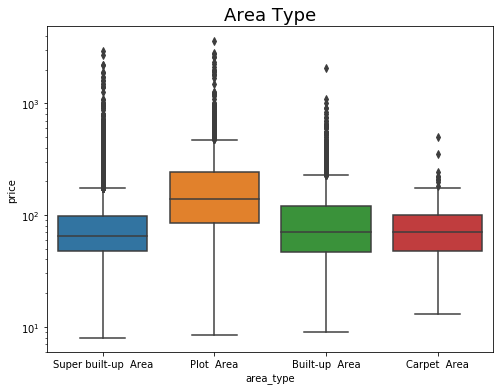

In [8]:
plt.figure(figsize=(8,6))
plt.yscale('log')
plt.title('Area Type',fontsize=18)
sb.boxplot(x='area_type',y='price',data=df)

By here, we observe that there is not much difference between the area_type and the price.

In [9]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

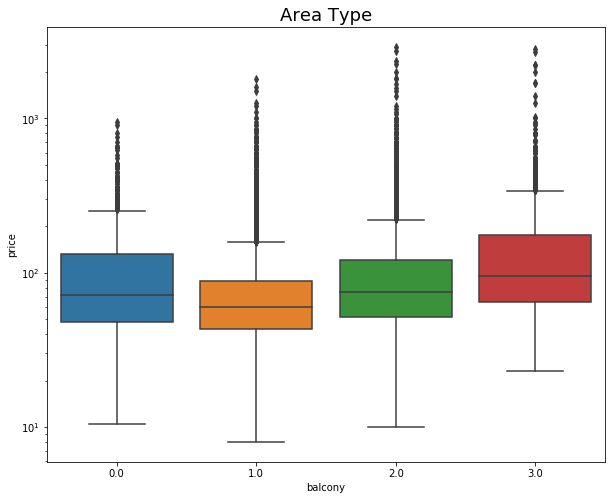

In [10]:
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.title('Area Type',fontsize=18)
sb.boxplot(x='balcony',y='price',data=df)

In [11]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
17-Jan               1
16-Jan               1
15-Dec               1
15-Jun               1
Name: availability, Length: 81, dtype: int64

In [12]:
df.groupby('availability')['price'].mean()

availability
14-Jul                   43.710000
14-Nov                   43.710000
15-Aug                   62.000000
15-Dec                  130.000000
15-Jun                   97.000000
                           ...    
22-Mar                   49.000000
22-May                  225.500000
22-Nov                   78.370000
Immediate Possession     98.921875
Ready To Move           115.179137
Name: price, Length: 81, dtype: float64

In [13]:
df['month'] =  df['availability'].apply(lambda x:x.split('-')[-1])

In [14]:
df.groupby('month')['price'].mean().sort_values(ascending=False)

month
Jan                     194.345873
Feb                     123.664533
Mar                     119.812744
Ready To Move           115.179137
Sep                     115.088793
Jul                     107.537767
May                     106.666627
Apr                      99.505705
Immediate Possession     98.921875
Dec                      95.154464
Jun                      89.660650
Oct                      84.513626
Nov                      71.347911
Aug                      70.045221
Name: price, dtype: float64

In [15]:
df1=df.drop(['area_type','balcony','society','availability'],axis=1)

In [16]:
df1.drop(['month'],axis=1,inplace=True)

In [17]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [18]:
nan_check(df1)

location      0.01
size          0.12
total_sqft    0.00
bath          0.55
price         0.00
dtype: float64

In [19]:
df2=df1.dropna()  # If you want to do imputation then it is perfectly fine

In [20]:
nan_check(df2)

location      0.0
size          0.0
total_sqft    0.0
bath          0.0
price         0.0
dtype: float64

In [21]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df2['size']= df2['size'].apply(lambda x:x.split()[0]).astype(int)

In [23]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [24]:
df2['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  int32  
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), int32(1), object(2)
memory usage: 569.2+ KB


In [26]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
def convert_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
df2[~df2['total_sqft'].apply(convert_float)]   

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
...,...,...,...,...,...
12975,Whitefield,2,850 - 1060,2.0,38.190
12990,Talaghattapura,3,1804 - 2273,3.0,122.000
13059,Harlur,2,1200 - 1470,2.0,72.760
13265,Hoodi,2,1133 - 1384,2.0,59.135


In [29]:
def convert_sqft_to_float(x):
    token=x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [30]:
convert_sqft_to_float('3456')

3456.0

In [31]:
df3=df2.copy()

In [32]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_float)

In [33]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [34]:
df3[~df3['total_sqft'].apply(convert_float)]

,location,size,total_sqft,bath,price


In [35]:
df3[df3['total_sqft'].isnull()]

,location,size,total_sqft,bath,price
410,Kengeri,1,NaN,1.0,18.50
648,Arekere,9,NaN,9.0,265.00
775,Basavanagara,1,NaN,2.0,93.00
872,Singapura Village,2,NaN,2.0,45.00
1019,Marathi Layout,1,NaN,1.0,110.00
1086,Narasapura,2,NaN,2.0,29.50
1400,Chamrajpet,9,NaN,9.0,296.00
1712,Singena Agrahara,3,NaN,3.0,95.00
1743,Hosa Road,3,NaN,3.0,115.00
1821,Sarjapur,3,NaN,3.0,76.00


In [36]:
nan_check(df3)

location      0.00
size          0.00
total_sqft    0.35
bath          0.00
price         0.00
dtype: float64

In [37]:
#df3.drop(['total_Sqft'],axis=1,inplace=True)

In [38]:
nan_check(df3)

location      0.00
size          0.00
total_sqft    0.35
bath          0.00
price         0.00
dtype: float64

In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [40]:
imputer = IterativeImputer(verbose=1)
df3['total_sqft'] = imputer.fit_transform(df3[['total_sqft']])

In [41]:
df3['total_sqft'][1821]

1555.3027829545454

In [42]:
df3['total_sqft'] = round(df3['total_sqft'])

In [43]:
df3['total_sqft'][872]

1555.0

In [44]:
nan_check(df3)

location      0.0
size          0.0
total_sqft    0.0
bath          0.0
price         0.0
dtype: float64

In [45]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


## Feature Engineering

In [46]:
df3['price_per_sqft']=(df3['price']*100000)/df3['total_sqft']

In [47]:
df3.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [48]:
len(df3.location.unique())

1304

In [49]:
df3.location = df3.location.str.strip()

In [50]:
len(df3.location.unique())

1293

In [51]:
df3.location = df3.location.str.lower()

In [52]:
len(df3.location.unique())

1282

In [53]:
location_count=df3.location.value_counts()

In [54]:
location_count.unique()

array([535, 392, 304, 266, 236, 210, 186, 176, 175, 171, 152, 150, 149,
       141, 131, 106,  98,  96,  88,  87,  85,  84,  81,  79,  74,  73,
        72,  70,  68,  67,  66,  64,  63,  62,  60,  58,  57,  54,  53,
        52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,
        39,  38,  37,  36,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
      dtype=int64)

In [55]:
# random threshold
len(location_count[location_count<=10])

1041

In [56]:
location_less_than_11 = location_count[location_count<=10]

In [57]:
location_less_than_11

naganathapura           10
ganga nagar             10
gunjur palya            10
nagappa reddy layout    10
nagadevanahalli         10
                        ..
pillahalli               1
1kasavanhalli            1
1 ramamurthy nagar       1
shanthinagar             1
arekempanahalli          1
Name: location, Length: 1041, dtype: int64

In [58]:
df3.location=df3.location.apply(lambda x: 'other' if x in location_less_than_11 else x)

In [59]:
len(df3.location.unique())

242

## Outliers Detection

#### Outlier detection - 1 Total sqft of each bedroom is not less than 300

In [60]:
df3.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,electronic city phase ii,2,1056.0,2.0,39.07,3699.810606
1,chikka tirupathi,4,2600.0,5.0,120.00,4615.384615
2,uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,kothanur,2,1200.0,2.0,51.00,4250.000000


### DOMAIN KNOWLEDGE

In [61]:
df3[(df3['total_sqft']/df3['size']<300)]

,location,size,total_sqft,bath,price,price_per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,hsr layout,8,600.0,9.0,200.0,33333.333333
58,murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000
...,...,...,...,...,...,...
13277,other,7,1400.0,7.0,218.0,15571.428571
13279,other,6,1200.0,5.0,130.0,10833.333333
13281,margondanahalli,5,1375.0,5.0,125.0,9090.909091
13303,vidyaranyapura,5,774.0,5.0,70.0,9043.927649


In [62]:
df4=df3[~(df3['total_sqft']/df3['size']<300)]

In [63]:
df4.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,electronic city phase ii,2,1056.0,2.0,39.07,3699.810606
1,chikka tirupathi,4,2600.0,5.0,120.00,4615.384615
2,uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,kothanur,2,1200.0,2.0,51.00,4250.000000


In [64]:
df4.shape

(12498, 6)

In [65]:
df4.price_per_sqft.describe([0.80,0.90,0.95,0.99])

count     12498.000000
mean       6316.832988
std        4184.051352
min         267.829813
50%        5294.292025
80%        7474.184120
90%       10000.000000
95%       13392.857143
99%       21875.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

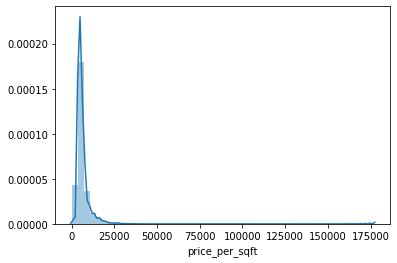

In [66]:
sb.distplot(df4.price_per_sqft)

In [67]:
#for key,subdf in df4.groupby('location'):
 #   print(key,subdf)

#### Outlier detection - 2 Cap Outliers

In [68]:
def cap_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mu = np.mean(subdf.price_per_sqft)
        sigma = np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(mu-1*sigma)) & (subdf.price_per_sqft<(mu+1*sigma))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=False)
    return df_out

In [69]:
df5=cap_outliers(df4)

In [70]:
df5.shape

(10286, 6)

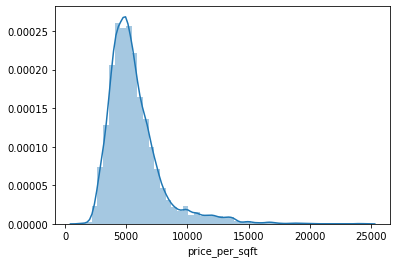

In [71]:
sb.distplot(df5.price_per_sqft)

In [72]:
df5.price_per_sqft.describe([0.80,0.90,0.95,0.99])

count    10286.000000
mean      5664.896504
std       2277.426925
min       1250.000000
50%       5175.792088
80%       6790.123457
90%       8084.469359
95%      10169.135451
99%      13956.248530
max      24509.803922
Name: price_per_sqft, dtype: float64

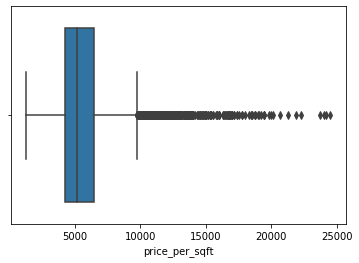

In [73]:
sb.boxplot(df5.price_per_sqft)

#### Outlier detection - 3 Bathroom per bedroom outlier

In [74]:
df5['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [75]:
df5['size'].unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 10, 11, 16, 13])

In [76]:
df5[df5['bath']>df5['size']+1]

,location,size,total_sqft,bath,price,price_per_sqft
1063,2nd stage nagarbhavi,6,3000.0,8.0,451.0,15033.333333
1068,2nd stage nagarbhavi,6,2400.0,8.0,450.0,18750.000000
6836,arekere,4,2710.0,6.0,142.0,5239.852399
1881,bannerghatta,4,3012.0,6.0,250.0,8300.132802
7797,begur road,4,2464.0,6.0,118.0,4788.961039
...,...,...,...,...,...,...
3004,whitefield,3,3850.0,5.0,316.0,8207.792208
4681,whitefield,3,2700.0,5.0,175.0,6481.481481
7302,whitefield,4,4003.0,6.0,300.0,7494.379216
3356,yelahanka,4,2912.0,6.0,125.5,4309.752747


In [77]:
df6=df5[df5['bath']<df5['size']+2]

In [78]:
df6.shape

(10192, 6)

## OUTLIERS 4

In [79]:
df6.head()

,location,size,total_sqft,bath,price,price_per_sqft
210,1st block jayanagar,4,2850.0,4.0,428.0,15017.543860
848,1st block jayanagar,3,1630.0,3.0,194.0,11901.840491
2152,1st block jayanagar,3,1875.0,2.0,235.0,12533.333333
7138,1st block jayanagar,3,1200.0,2.0,130.0,10833.333333
7358,1st block jayanagar,2,1235.0,2.0,148.0,11983.805668


In [80]:
def scatter_plot(df,location,b1,b2):
    plt.figure(figsize=(20,10))
    bhk2 = df[(df['location'] == location.lower()) & (df['size'] == b1)]
    bhk3 = df[(df['location'] == location.lower()) & (df['size'] == b2)]
    plt.scatter(bhk2['price_per_sqft'],bhk2['price'],color='blue',label=str(b1)+'BHK', s=50)
    plt.scatter(bhk3['price_per_sqft'],bhk3['price'],marker='+', color='green',label=str(b2)+'BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()

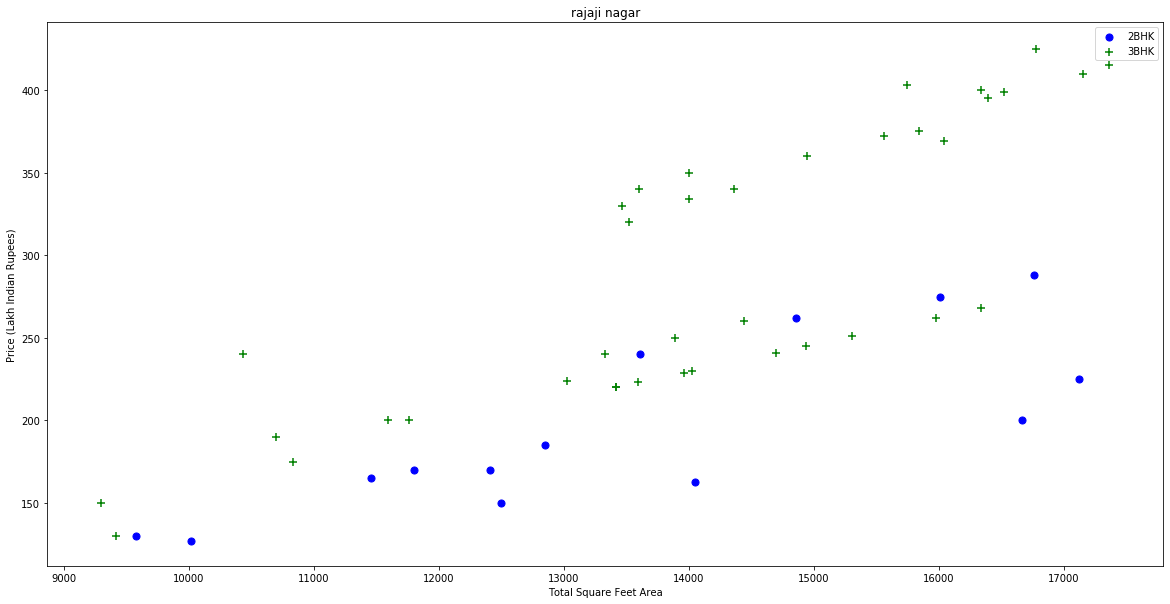

In [81]:
scatter_plot(df6,'rajaji nagar',2,3)

In [82]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)

In [83]:
df7=remove_bhk_outliers(df6)

In [84]:
#for key,location_df in df6.groupby('location'):
 #   print(location_df)

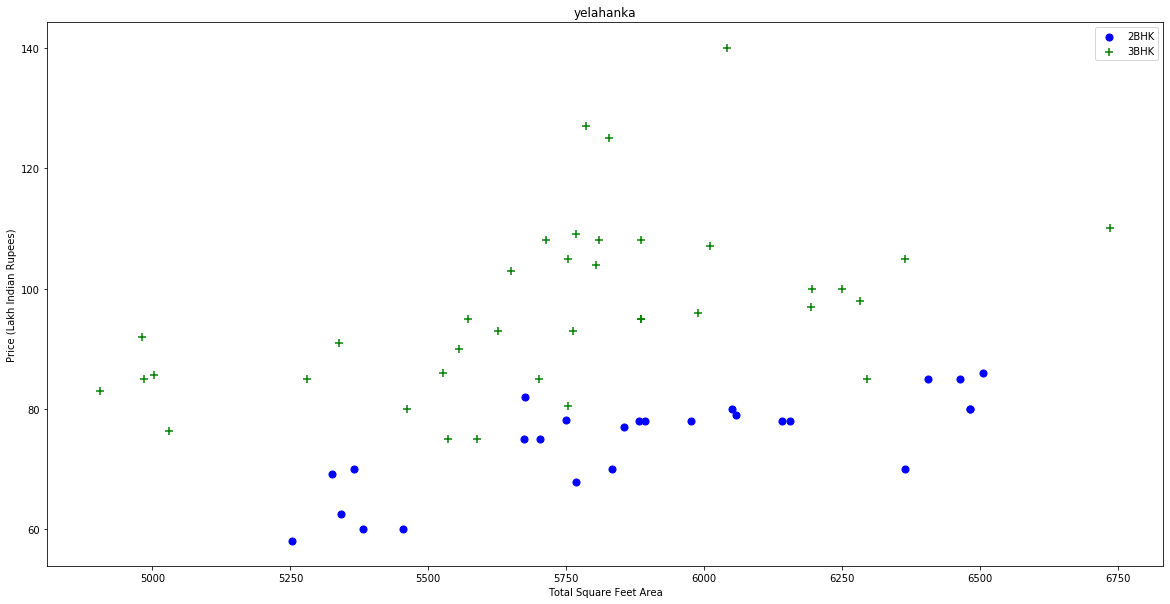

In [85]:
scatter_plot(df7,'yelahanka',2,3)

In [86]:
df7.shape

(7266, 6)

# ONE HOT ENCODING

In [87]:
df7.head()

,location,size,total_sqft,bath,price,price_per_sqft
210,1st block jayanagar,4,2850.0,4.0,428.0,15017.543860
848,1st block jayanagar,3,1630.0,3.0,194.0,11901.840491
2152,1st block jayanagar,3,1875.0,2.0,235.0,12533.333333
7138,1st block jayanagar,3,1200.0,2.0,130.0,10833.333333
7358,1st block jayanagar,2,1235.0,2.0,148.0,11983.805668


In [88]:
df8=df7.reset_index(drop='index')

In [89]:
df8.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,1st block jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st block jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st block jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st block jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st block jayanagar,2,1235.0,2.0,148.0,11983.805668


In [90]:
location_dummies=pd.get_dummies(df8['location'])

In [91]:
location_dummies.drop(['other'],axis=1,inplace=True)

In [92]:
df9=pd.concat([df8,location_dummies],axis=1)

In [93]:
df9.head()

,location,size,total_sqft,bath,price,price_per_sqft,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1st block jayanagar,4,2850.0,4.0,428.0,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st block jayanagar,3,1630.0,3.0,194.0,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st block jayanagar,3,1875.0,2.0,235.0,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st block jayanagar,3,1200.0,2.0,130.0,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st block jayanagar,2,1235.0,2.0,148.0,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df9.drop(['location','price_per_sqft'],axis=1,inplace=True)

In [95]:
df9.head()

,size,total_sqft,bath,price,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,4,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train & Test

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [97]:
y=df9.pop('price')

In [98]:
X_train,X_test,y_train,y_test=train_test_split(df9,y,test_size=0.2,random_state=10)

In [99]:
print(X_train.shape)
print(X_test.shape)

(5812, 244)
(1454, 244)


# Feature Scaling

In [100]:
scale  = MinMaxScaler()
X_train=scale.fit_transform(X_train)

In [101]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [102]:
y_train_pred=model.predict(X_train)
r2_score(y_train,y_train_pred)

0.8421194340069318

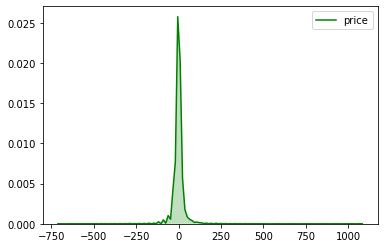

In [103]:
res = y_train - y_train_pred
sb.kdeplot(res,shade=True,color='green')

# Accuracy of our Model

In [104]:
X_test=scale.transform(X_test)

In [105]:
y_test_pred=model.predict(X_test)
r2_score(y_test,y_test_pred)

0.8763999806943704

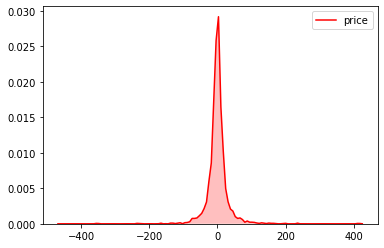

In [106]:
res2 = y_test - y_test_pred
sb.kdeplot(res2,shade=True,color='red')

## SINGLE PREDICTION

In [107]:
df9.head()

,size,total_sqft,bath,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,4,2850.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
def predict_price(location,size,total_sqft,bath):   
    try:
        location=location.lower()
        loc_index = np.where(df9.columns==location)[0][0] #6
        x = np.zeros(len(df9.columns))
        x[0] = size
        x[1] = total_sqft
        x[2] = bath

        if loc_index >= 0:
            x[loc_index] = 1
        x_trans=scale.transform([x])
        return model.predict(x_trans)[0]
    except:
        print('invalid location')

In [109]:
predict_price('1st block jayanagar',3,1875,2)
# Area = 1875; Size= 3 BHK; bathroom = 2

272.28205258070443